In [1]:
#remove na from data for tsne

from time import time
import numpy as np
import pandas as pd
#plotting library
import matplotlib.pyplot as plt
from matplotlib import offsetbox
#plotting library
import seaborn as sns
#plotting library
from plotnine import *
from sklearn import (manifold,datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import pyreadr
#import fbprophet
from collections import OrderedDict, defaultdict


In [2]:
#open csv file with pandas
angio=pd.read_csv('Tracing_long_AC2.csv')

#Time - time between points
#Pa -  Aortic pressure
#Pa mean - cycle MAP
#Pd - distal pressure
#Pd mean -  average cycle Pd
#Pd/Pa - ratio b/w Pa mean and Pd mean. the "/" sometimes causes some problems if you want I can substitute it with "_"
#Hear Rate
#ECG - ecg does not actually have any significant value in it because the cath lab does not use this system to get the ecg. So to split the cycles I find that what works best is smoothing the curve (I use savitzky golay filter) and then use the derivative to find where the cycle ends. To identify diastole I use the second derivative to find the diacritic notch in the aortic trace.


#create data frame
angio_df=pd.DataFrame(angio)

#note that a rows have no data
angio_df


,Unnamed: 0,ID,Pos_Neg,FFR_Heart rate,FFR_Pa,FFR_Pa mean,FFR_Pd,FFR_Pd mean,FFR_Pd/Pa,FFR_Time
0,0,1,Negative,66.0,80.6,95.5,79.8,95.7,1.002090,0.00
1,1,1,Negative,66.0,80.3,95.5,79.7,95.7,1.002090,0.01
2,2,1,Negative,66.0,78.8,95.5,79.0,95.7,1.002090,0.02
3,3,1,Negative,66.0,77.9,95.5,78.5,95.7,1.002090,0.03
4,4,1,Negative,66.0,77.1,95.5,77.6,95.7,1.002090,0.04
...,...,...,...,...,...,...,...,...,...,...
19934,8480,2,Positive,71.0,63.9,68.4,63.3,68.3,0.998538,84.80
19935,8481,2,Positive,71.0,62.7,68.3,62.3,68.3,1.000000,84.81
19936,8482,2,Positive,71.0,61.7,68.3,61.2,68.3,1.000000,84.82
19937,8483,2,Positive,71.0,60.8,68.3,60.1,68.3,1.000000,84.83


In [3]:
#preparing data for tsne
#select columns-note difference with selecting one and multiple columns
X = angio_df [['FFR_Pa','FFR_Pd']]
y = angio_df['Pos_Neg']
X

,FFR_Pa,FFR_Pd
0,80.6,79.8
1,80.3,79.7
2,78.8,79.0
3,77.9,78.5
4,77.1,77.6
...,...,...
19934,63.9,63.3
19935,62.7,62.3
19936,61.7,61.2
19937,60.8,60.1


In [4]:
#initialise tsne
tsne = TSNE(n_components=2, random_state=0)
#perform tsne
tsne_obj= tsne.fit_transform(X)

In [5]:
#create data frame from results
#first dimension label X
#second dimension label Y
#outcome variable label Outcome
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'Positive':y})
tsne_df

,X,Y,Positive
0,-24.108078,-64.804787,Negative
1,-22.503180,-61.852715,Negative
2,-16.498791,-54.313690,Negative
3,-12.228748,-49.541523,Negative
4,-5.788677,-46.772701,Negative
...,...,...,...
19934,19.502106,80.280777,Positive
19935,14.806578,82.020790,Positive
19936,11.070518,82.566994,Positive
19937,8.221568,83.019547,Positive


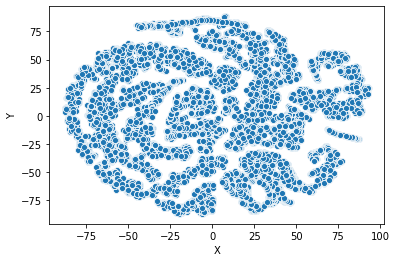

In [6]:
#plot with seaborn
sns.scatterplot(x="X", y="Y",
              data=tsne_df);
plt.show()

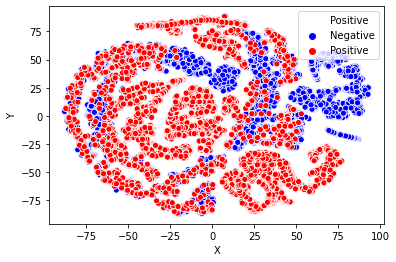

In [7]:
sns.scatterplot(x="X", y="Y",
              hue="Positive",
              palette=['blue','red'],
              legend='full',
              data=tsne_df);

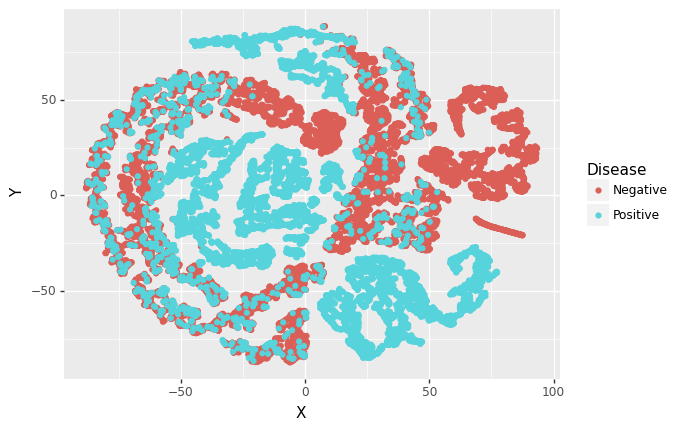

<ggplot: (129858717401)>

In [8]:
#ggplot style
#note the use of data merged from tsne output
(ggplot (tsne_df)
 + geom_point(aes('X ', 'Y',color='factor(Positive)')))+labs(color="Disease")
